# **Praktikum I Machine Learning (*Feature Engineering*)**


Nama: Athaya Fairuzindah

NPM: F1F022039

# **Latar Belakang**




*Feature engineering* merupakan salah satu tahapan krusial dalam pengembangan model machine learning (Guyon et al., 2006; Kuhn & Johnson, 2013). Proses ini melibatkan transformasi data mentah menjadi fitur-fitur yang dapat merepresentasikan pola mendasar dari data dengan lebih baik, sehingga meningkatkan kinerja model prediktif (Bengio et al., 2013; Domingos, 2012). Kualitas fitur yang digunakan sangat memengaruhi kemampuan model untuk mempelajari hubungan yang kompleks dalam data dan membuat prediksi yang akurat (Hastie et al., 2009; James et al., 2013).

Dalam konteks analisis data cuaca, seperti dataset yang digunakan dalam penelitian ini, *feature engineering* menjadi sangat relevan (Krasnopolsky & Schmehl, 2011; McGovern et al., 2019). Data cuaca seringkali mengandung berbagai tantangan, termasuk nilai yang hilang (*missing values*), *outlier*, dan variabel kategorikal dengan kardinalitas tinggi (Junninen et al., 2004; Weerasinghe et al., 2019). Penanganan yang tepat terhadap isu-isu ini melalui teknik *feature engineering* dapat secara signifikan memperbaiki kualitas data input dan, pada gilirannya, meningkatkan akurasi model prediksi cuaca, seperti prediksi hujan (García et al., 2010; Lipton et al., 2016).

Penelitian ini akan mengeksplorasi berbagai teknik *feature engineering* yang umum digunakan, seperti imputasi nilai hilang, penanganan *outlier*, pengurangan kardinalitas, *encoding* variabel kategorikal, dan *scaling* fitur numerik (Ciaburro & Barrinello, 2018; Geron, 2019). Dengan menerapkan teknik-teknik ini pada dataset cuaca, diharapkan dapat ditunjukkan bagaimana *feature engineering* dapat berkontribusi pada peningkatan performa model machine learning dalam memprediksi kejadian hujan (Krasnopolsky & Schmehl, 2011; Roebber et al., 2004).

# **Rumusan Masalah**






1.   Bagaimana konsep dari berbagai jenis *feature engineering* pada Python?
2.   Bagaimana melakukan teknik *feature engineering* di program Python?



# **Tujuan Penelitian**





1.   Mahasiswa memahami konsep dari berbagai jenis *feature engineering* pada Python.
2.   Mahasiswa dapat melakukan teknik *feature engineering* di program Python.



# Mengimpor _Libraries_

Berikut merupakan _library_ yang akan digunakan dalam _notebook_ ini:

In [ ]:
!pip install feature_engine

In [ ]:
# Define Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split

# Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#Encoding
from sklearn.preprocessing import OneHotEncoder

#Handling Outlier
from feature_engine.outliers import Winsorizer

#Balancing Data
from imblearn.over_sampling import ADASYN

#model ML
from sklearn.linear_model import LogisticRegression

#model performence
from sklearn.metrics import classification_report, f1_score

# Memuat Data

Sebelum kita membahas lebih jauh tentang Feature Engineering, berikut ini adalah beberapa dataset yang akan digunakan untuk memperjelas tujuan dari notebook ini.

In [ ]:
# Load penelitian Dataset

df_ori = pd.read_csv('https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/data_penelitian.csv', sep=';')
data_pt1 = df_ori.copy()
data_pt1.head(10)

,Hujan,Suhu Udara,Kelembapan,Keadaan Cuaca,Kecepatan Angin
0,1,23.0,95,5.0,NaN
1,1,24.0,90,1.0,NaN
2,1,26.8,77,1.0,NaN
3,1,29.6,62,2.0,2.0
4,1,30.8,56,1.0,7.0
5,1,31.0,55,1.0,7.0
6,1,30.4,57,3.0,9.0
7,2,30.9,58,2.0,10.0
8,2,30.2,62,2.0,8.0
9,2,29.7,62,2.0,7.0


In [ ]:
# Melihat dimensi data
data_pt1.shape

(743, 5)

In [ ]:
#melihat tipe data
data_pt1.dtypes

,0
Hujan,int64
Suhu Udara,float64
Kelembapan,int64
Keadaan Cuaca,float64
Kecepatan Angin,float64


# _Feature Engineering_

## A - Missing Value

Data hilang (***missing data***) atau nilai hilang (***missing values***) terjadi ketika tidak ada data atau nilai yang tersimpan untuk suatu observasi pada variabel tertentu.

Kehilangan data adalah hal yang sering terjadi, baik dalam kompetisi data science maupun di dunia bisnis, dan dapat mempengaruhi kesimpulan yang diambil dari data tersebut. **Data yang tidak lengkap merupakan masalah yang tidak bisa dihindari saat bekerja dengan berbagai sumber data.**

---
### - Kenapa data hilang (data missing)?

Ada berbagai alasan mengapa data bisa hilang, antara lain:
* Nilai bisa **hilang** atau **tidak tersimpan dengan benar** saat proses pengumpulan data.
  
  Misalnya, data berasal dari survei yang diisi secara manual ke dalam formulir online. Petugas entri data bisa saja lupa mengisi satu kolom dalam formulir tersebut, sehingga nilai pada kolom itu menjadi hilang.

* **Nilai memang tidak ada.**

  Contohnya: untuk variabel yang dihitung dari hasil pembagian antara dua variabel, seperti rasio utang terhadap pendapatan. Jika seseorang tidak memiliki pendapatan, maka nilai rasio tersebut tidak dapat dihitung karena pembagian dengan nol tidak terdefinisi.


* Data hilang juga bisa terjadi karena **responden menolak menjawab** pertanyaan tertentu dalam formulir.
  
  Misalnya, seseorang mungkin enggan mengungkapkan jumlah pendapatannya. Akibatnya, nilai untuk variabel “pendapatan” akan menjadi hilang bagi orang tersebut.

Selain memahami penyebab hilangnya data, **penting juga untuk memahami mekanisme bagaimana nilai-nilai yang hilang itu muncul dalam dataset**.
Tergantung pada mekanismenya, kita bisa memilih untuk memproses nilai yang hilang dengan cara yang berbeda. Selain itu, dengan mengetahui sumber data yang hilang, kita juga bisa mengambil langkah untuk mengendalikan sumber tersebut, dan mengurangi jumlah data yang hilang di masa depan selama proses pengumpulan data.

In [ ]:
# Check Missing Values

data_pt1.isnull().sum()

,0
Hujan,0
Suhu Udara,0
Kelembapan,0
Keadaan Cuaca,9
Kecepatan Angin,314


In [ ]:
# Check Missing Values as Percentage to Total Data

data_pt1.isnull().mean()

,0
Hujan,0.000000
Suhu Udara,0.000000
Kelembapan,0.000000
Keadaan Cuaca,0.012113
Kecepatan Angin,0.422611


In [ ]:
#Missing value kolom Keadaan Cuaca
data_pt1[data_pt1['Keadaan Cuaca'].isnull()].head(10)

,Hujan,Suhu Udara,Kelembapan,Keadaan Cuaca,Kecepatan Angin
41,2,26.0,92,NaN,NaN
206,1,23.8,98,NaN,5.0
309,1,23.3,97,NaN,NaN
511,2,28.8,79,NaN,12.0
597,2,24.6,92,NaN,NaN
638,1,22.8,98,NaN,4.0
674,2,25.5,96,NaN,NaN
722,2,27.0,80,NaN,4.0
724,2,31.0,57,NaN,6.0


### Penanganan Data Missing

#### Melakukan Imputasi Missing Value

In [ ]:
df_imp4=data_pt1.copy()

# Isi NaN dengan interpolasi
df_imp4['Keadaan Cuaca'] = df_imp4['Keadaan Cuaca'].interpolate(method='linear')
df_imp4.isnull().sum()

# Isi NaN dengan median
df_imp4['Kecepatan Angin'] = df_imp4['Kecepatan Angin'].fillna(median_value)
df_imp4.isnull().sum()

,0
Hujan,0
Suhu Udara,0
Kelembapan,0
Keadaan Cuaca,0
Kecepatan Angin,0


Melakukan imputasi Missing Value menggunakan 2 jenis metode yang berbeda. Pada variabel keadaan cuaca menggunakan interpolasi dengan metode linier, sedangkan pada variabel kecepatan angin menggunakan metode median, hal ini dikarenakan pada kecepatan angin 42% data mengalami missing value, sehingga dengan menggunakan median, diharapkan hasil yang lebih robust.

## B - Kardinalitas

In [ ]:
df_imp4.head(10)

,Hujan,Suhu Udara,Kelembapan,Keadaan Cuaca,Kecepatan Angin
0,1,23.0,95,5.0,6.0
1,1,24.0,90,1.0,6.0
2,1,26.8,77,1.0,6.0
3,1,29.6,62,2.0,2.0
4,1,30.8,56,1.0,7.0
5,1,31.0,55,1.0,7.0
6,1,30.4,57,3.0,9.0
7,2,30.9,58,2.0,10.0
8,2,30.2,62,2.0,8.0
9,2,29.7,62,2.0,7.0


In [ ]:
df_imp4['Keadaan Cuaca'].unique()

array([ 5. ,  1. ,  2. ,  3. , 14. , 60. , 61. , 21. , 29. , 10. , 16. ,
       62. , 63. , 65. , 15. , 17. , 13. , 95. , 91. , 49. , 97. , 56. ,
        1.5])

In [ ]:
#Mengurangi Kardinalitas

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
### 2. Tentukan Label untuk Setiap Bin
# 10 label (0 s/d 9)
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### 3. Terapkan pd.cut
df_imp4['Keadaan_Cuaca_reduced'] = pd.cut(
    df_imp4['Keadaan Cuaca'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

### 4. Verifikasi
print("--- Hasil Perbandingan ---")
# Menampilkan 10 data acak untuk melihat perubahannya
print(df_imp4.sample(10))

print("\n--- Pengecekan Kardinalitas ---")
print('Jumlah kategori di "Keadaan Cuaca" asli : {}'.format(len(df_imp4['Keadaan Cuaca'].unique())))
print('Jumlah kategori di "Keadaan_Cuaca_reduced" : {}'.format(len(df_imp4['Keadaan_Cuaca_reduced'].unique())))

print("\nKategori unik yang baru (reduced):")
print(df_imp4['Keadaan_Cuaca_reduced'].unique())

--- Hasil Perbandingan ---
     Hujan  Suhu Udara  Kelembapan  Keadaan Cuaca  Kecepatan Angin  \
301      2        27.0          86           60.0              6.0   
454      2        24.8          96            2.0              6.0   
233      2        25.4          84            2.0              6.0   
287      2        25.3          86           29.0              6.0   
186      2        22.7          95           61.0              6.0   
303      2        25.7          95           13.0              3.0   
577      1        24.9          89            2.0              6.0   
715      2        23.6          96           17.0              6.0   
555      2        27.8          79            2.0              3.0   
705      2        30.1          75            2.0              8.0   

    Keadaan_Cuaca_reduced  
301                     5  
454                     0  
233                     0  
287                     2  
186                     6  
303                     1  
577   

## C- Splitting Data

In [ ]:
#mendeskripsikan variabel X dan y
df_imp4=df_imp4.drop('Keadaan Cuaca', axis = 1)
X= df_imp4.drop('Hujan', axis = 1)
y=df_imp4['Hujan']

In [ ]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.1,random_state=200, stratify=y)
X_test.shape

(75, 4)

Proses selanjutnya setelah melakukan *feature engineering* adalah membagi dataset yang telah diproses menjadi dua bagian utama: data pelatihan (*training set*) dan data pengujian (*testing set*). Pembagian ini sangat penting untuk mengevaluasi kinerja model *machine learning* secara objektif. Data pelatihan digunakan untuk "mengajari" model pola-pola dalam data, sementara data pengujian yang belum pernah dilihat oleh model sebelumnya digunakan untuk mengukur seberapa baik model dapat menggeneralisasi dan membuat prediksi pada data baru. Dalam kasus ini, dataset dibagi dengan rasio 90% untuk pelatihan (`X_train`, `y_train`) dan 10% untuk pengujian (`X_test`, `y_test`) menggunakan fungsi `train_test_split` dari library scikit-learn, dengan `stratify=y` untuk memastikan proporsi kelas target (`y`) yang sama di kedua set data.

## D- Handling Outlier

In [ ]:
#buat list fitur numerik
list_num = ['Suhu Udara', 'Kelembapan', 'Kecepatan Angin']
# Hitung IQR
list_outlier=[]
list_lower_bound =[]
list_upper_bound =[]
for i in X_train[list_num]:
    Q1 = np.percentile(X_train[i], 25)
    Q3 = np.percentile(X_train[i], 75)
    IQR = Q3 - Q1

    # Tentukan batas bawah dan batas atas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    list_lower_bound.append(lower_bound)
    list_upper_bound.append(upper_bound)

    # Hitung jumlah outlier di bawah batas bawah dan di atas batas atas
    num_outliers_lower = np.sum(X_train[i] < lower_bound)
    num_outliers_upper = np.sum(X_train[i] > upper_bound)

    # Jumlah total outlier
    total_outliers = num_outliers_lower + num_outliers_upper
    list_outlier.append(total_outliers)

#Mendefinikan dataframe baru mengenai outliers
outliers = pd.DataFrame()
outliers['Kolom'] = list_num
outliers['Jumlah Outlier'] = list_outlier
outliers['Lower Bound'] = list_lower_bound
outliers['Upper Bound'] = list_upper_bound
outliers

,Kolom,Jumlah Outlier,Lower Bound,Upper Bound
0,Suhu Udara,0,17.3375,35.8375
1,Kelembapan,0,46.5000,122.5000
2,Kecepatan Angin,225,4.5000,8.5000


Berdasarkan hasil, didapatkan bahwa pada variabel kecepatan angin didapatkan *outlier* data sebesar 225 data. Sehingga perlu diatasi dengan metode yang tepat.

In [ ]:
#mendefinisikan kolom yang digunakan dan list tempat value skewness
df_num = X_train[list_num]
nilai_skew = []
nilai_skew_normal = []

#membuat fungsi untuk memetakan distribusi setiap kolom
for i in df_num.columns:
    skewness = X_train[i].skew()
    if -0.5 <= skewness <= 0.5:
        nilai_skew_normal.append(i)
    else:
        nilai_skew.append(i)

# Menampilkan list
print('kolom yang mempunyai nilai skewness sedang:', nilai_skew)
print('kolom yang mempunyai nilai skewness normal:', nilai_skew_normal)

kolom yang mempunyai nilai skewness sedang: ['Kelembapan', 'Kecepatan Angin']
kolom yang mempunyai nilai skewness normal: ['Suhu Udara']


Berdasarkan sebaran datanya, diketahui bahwa variabel kecepatan angin memiliki distribusi *skew*. Selanjutnya dilakukan proses mengatasi *outlier* dengan menggunakan *capping*

#### Capping

In [ ]:
# Capping the skew distribution
winsoriser_kuantil = Winsorizer(capping_method='quantiles',
                                tail='both',
                                fold=0.2, # Batas bawah 0.2, batas atas 1-0.2 = 0.8
                                variables=['Kecepatan Angin'],
                                missing_values='ignore')

X_train_capped = winsoriser_kuantil.fit_transform(X_train)
X_test_capped = winsoriser_kuantil.transform(X_test)

print('Size dataset - Before trimming : ', X_train.shape)
print('Size dataset - After trimming  : ', X_train_capped.shape)

Size dataset - Before trimming :  (668, 4)
Size dataset - After trimming  :  (668, 4)


Untuk menangani *outlier* yang teridentifikasi pada kolom 'Kecepatan Angin', digunakan teknik *capping* dengan metode kuantil (*quantiles*). Teknik ini mengganti nilai-nilai *outlier* yang berada di bawah persentil bawah (dalam hal ini 20% atau kuantil 0.2) dengan nilai pada persentil bawah tersebut, dan nilai-nilai *outlier* yang berada di atas persentil atas (dalam hal ini 80% atau kuantil 0.8) dengan nilai pada persentil atas tersebut. Metode ini dipilih karena kolom 'Kecepatan Angin' memiliki distribusi yang *skew* seperti yang ditunjukkan pada analisis sebelumnya, di mana metode kuantil lebih robust dibandingkan metode yang berbasis standar deviasi (seperti metode Gaussian) yang mengasumsikan distribusi normal. Penerapan *capping* ini dilakukan pada data pelatihan (`X_train`) menggunakan `Winsorizer` dari library `feature_engine`, dan kemudian transformasi yang sama diterapkan pada data pengujian (`X_test`) untuk memastikan konsistensi. Hasilnya, *outlier* pada kedua ujung distribusi 'Kecepatan Angin' digantikan dengan nilai batas yang ditentukan oleh kuantil, seperti yang terlihat pada visualisasi setelah *capping*.

#### visualisasi

In [ ]:
#Defining a function to create histogram and box plot for certain variables
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(10, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30, color='teal')
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable], color='teal')
    plt.title('Boxplot')

    plt.show()

Suhu Udara - Before Capping


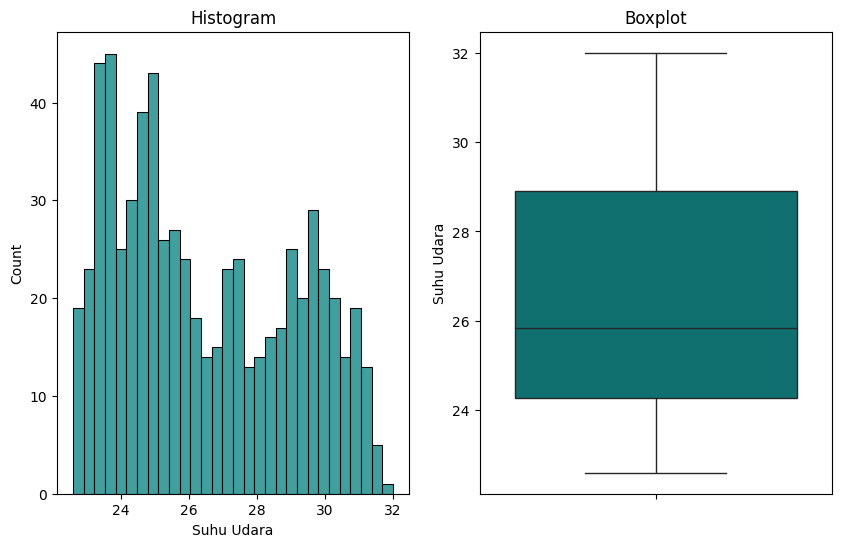


Suhu Udara - After Capping


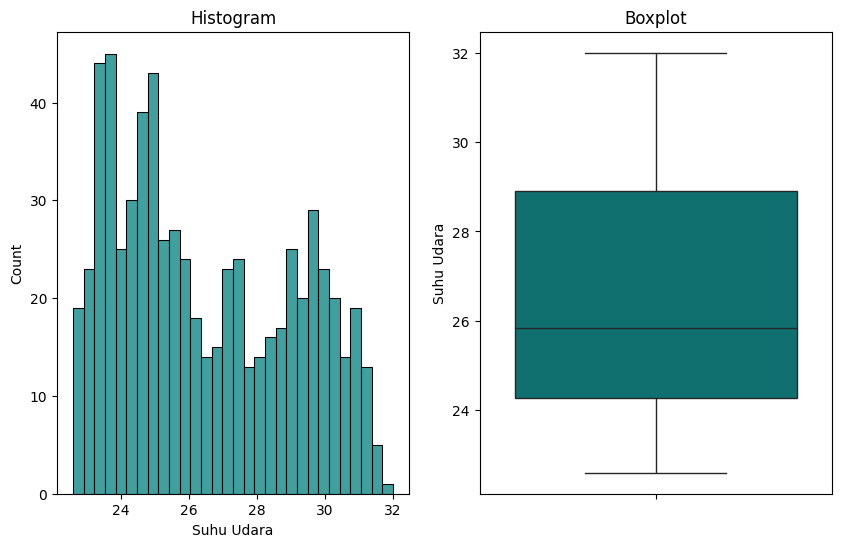

Kelembapan - Before Capping


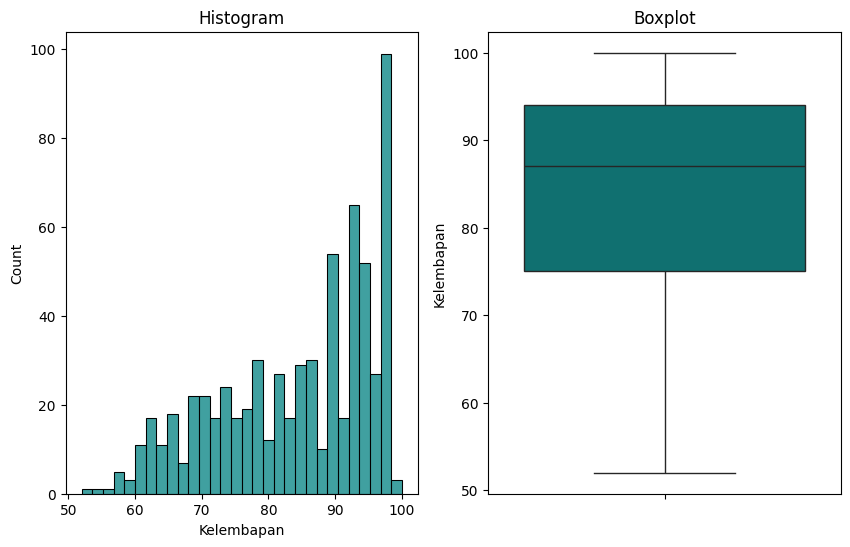


Kelembapan - After Capping


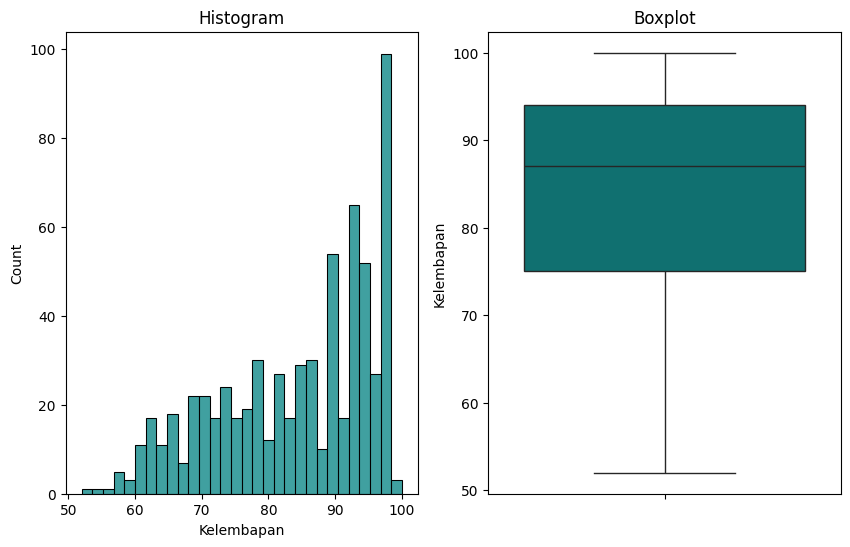

Kecepatan Angin - Before Capping


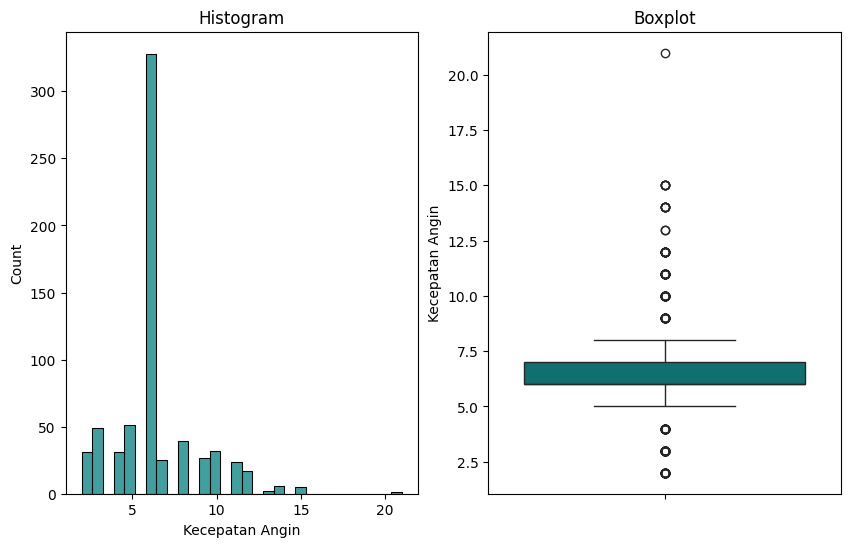


Kecepatan Angin - After Capping


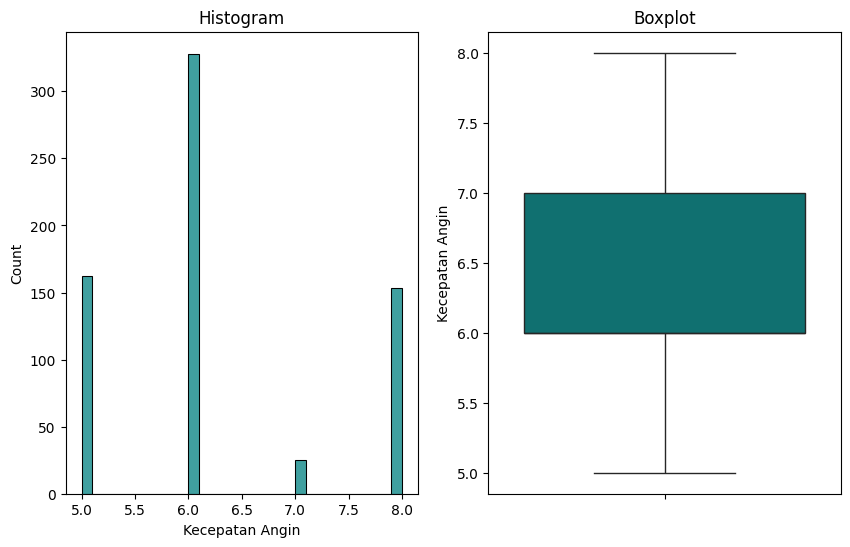

In [ ]:
# Plotting histogram and boxplot before and after capping
for col in list_num:
  print(f'{col} - Before Capping')
  diagnostic_plots(X_train, col)

  print(f'\n{col} - After Capping')
  diagnostic_plots(X_train_capped, col)


Dapat terlihat bahwa pada variabel kecepatan angin setelah dilakukan *capping* sudah tidak memiliki *outlier* data.

## E- Scaling

In [ ]:
#mendefinisikan kolom yang digunakan dan list tempat value skewness
nilai_skew = []
nilai_skew_normal = []

#membuat fungsi untuk memetakan distribusi setiap kolom
for i in df_num.columns:
    skewness = X_train_capped[i].skew()
    if -0.5 <= skewness <= 0.5:
        nilai_skew_normal.append(i)
    else:
        nilai_skew.append(i)

# Menampilkan list
print('kolom yang mempunyai nilai skewness sedang:', nilai_skew)
print('kolom yang mempunyai nilai skewness normal:', nilai_skew_normal)

kolom yang mempunyai nilai skewness sedang: ['Kelembapan', 'Kecepatan Angin']
kolom yang mempunyai nilai skewness normal: ['Suhu Udara']


In [ ]:
# melakukan scalling menggunakan standard scaller
standard_scaler = StandardScaler()
standard_scaler.fit(X_train_capped[nilai_skew_normal])
X_train_capped[nilai_skew_normal] = standard_scaler.transform(X_train_capped[nilai_skew_normal])
X_test_capped[nilai_skew_normal] = standard_scaler.transform(X_test_capped[nilai_skew_normal])

In [ ]:
#melakukan scalling menggunakan robust scaller
robust_scaler = RobustScaler()
robust_scaler.fit(X_train_capped[nilai_skew])
X_train_capped[nilai_skew] = robust_scaler.transform(X_train_capped[nilai_skew])
X_test_capped[nilai_skew] = robust_scaler.transform(X_test_capped[nilai_skew])

In [ ]:
X_train_scale = X_train_capped
X_test_scale = X_test_capped

Setelah menangani *outlier*, tahap selanjutnya adalah melakukan *scaling* pada data. *Scaling* adalah proses mengubah rentang nilai fitur agar berada dalam skala yang serupa. Hal ini penting karena banyak algoritma *machine learning* sensitif terhadap skala fitur. Dalam kasus ini, digunakan dua jenis *scaler* berdasarkan distribusi fitur: `StandardScaler` untuk fitur yang berdistribusi normal (atau mendekati normal) dan `RobustScaler` untuk fitur yang berdistribusi *skew* atau memiliki *outlier* (meskipun sudah dicapping, *RobustScaler* lebih tahan terhadap nilai ekstrem).

`StandardScaler` menstandarisasi fitur dengan menghapus rata-rata dan menskalakan ke varians unit. Formula standarisasinya adalah z = (x - u) / s, di mana u adalah rata-rata sampel dan s adalah deviasi standar sampel. Ini menghasilkan fitur dengan rata-rata 0 dan deviasi standar 1.

`RobustScaler` menskalakan fitur menggunakan statistik yang lebih kuat terhadap *outlier*. Ini menghapus median dan menskalakan data berdasarkan rentang antar-kuartil (IQR). Formula penskalaannya adalah (x - median) / IQR. *RobustScaler* sangat berguna ketika data mengandung *outlier* karena median dan IQR kurang terpengaruh oleh nilai ekstrem dibandingkan rata-rata dan deviasi standar.

Penerapan kedua *scaler* ini pada data pelatihan dan pengujian memastikan bahwa model menerima input dengan skala yang konsisten, yang dapat meningkatkan kinerja model.

## F- Encoding

### One Hot Encoder

In [ ]:
list_cat = ['Keadaan_Cuaca_reduced']

encoder = OneHotEncoder()

#melakukan encoding
X_train_encoded = encoder.fit_transform(X_train_scale[list_cat])
X_test_encoded = encoder.transform(X_test_scale[list_cat])

Setelah proses *scaling*, variabel kategorikal perlu diubah menjadi format numerik agar dapat diproses oleh sebagian besar algoritma *machine learning*. Salah satu teknik yang umum digunakan adalah *One Hot Encoding*. Teknik ini mengubah setiap kategori unik dalam sebuah kolom menjadi kolom biner (1 atau 2) yang terpisah. Dalam kasus ini, kolom 'Keadaan\_Cuaca\_reduced' yang merupakan hasil pengurangan kardinalitas akan di-*encode* menggunakan `OneHotEncoder` dari scikit-learn. Proses ini dilakukan pada data pelatihan (`X_train_scale`) dan kemudian transformasi yang sama diterapkan pada data pengujian (`X_test_scale`) untuk memastikan konsistensi representasi data kategorikal.

## G- Balancing Data

In [ ]:
y_train.value_counts()

,count
Hujan,
2,521
1,147


In [ ]:
adasyn = ADASYN(sampling_strategy='minority', n_neighbors=5, random_state=42)

X_train_balanced, y_train_balanced = adasyn.fit_resample(X_train_encoded, y_train)

print(y_train_balanced.value_counts())

Hujan
2    521
1    490
Name: count, dtype: int64


Setelah melakukan *encoding* pada data kategorikal, langkah selanjutnya adalah menangani ketidakseimbangan kelas (*imbalanced data*) pada dataset. Berdasarkan output `y_train.value_counts()`, dapat terlihat bahwa jumlah sampel pada kelas '2' jauh lebih banyak dibandingkan dengan kelas '1'. Ketidakseimbangan ini dapat menyebabkan model *machine learning* cenderung bias terhadap kelas mayoritas dan kurang baik dalam memprediksi kelas minoritas. Untuk mengatasi hal ini, digunakan teknik *oversampling* ADASYN (Adaptive Synthetic Sampling) dari library `imblearn` (He et al., 2008; Lemaitre et al., 2017). ADASYN bekerja dengan menghasilkan sampel sintetis untuk kelas minoritas. Berbeda dengan SMOTE yang menghasilkan sampel di antara sampel minoritas yang ada, ADASYN secara adaptif menghasilkan lebih banyak sampel untuk sampel minoritas yang "sulit" dipelajari (yang berada di dekat batas keputusan) (Chawla et al., 2002; He et al., 2008). Dengan menggunakan ADASYN (`adasyn.fit_resample`), jumlah sampel pada kelas minoritas ditingkatkan sehingga mendekati jumlah sampel pada kelas mayoritas, sehingga dapat mengurangi bias terhadap kelas mayoritas.

# _Training Model_

In [ ]:
#tanpa feature engineering
lr_1 = LogisticRegression()
lr_1.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#dengan feature engineering
lr_2 = LogisticRegression()
lr_2.fit(X_train_encoded, y_train)

LogisticRegression()

In [ ]:
#dengan feature engineering dan balancing data
lr_3 = LogisticRegression()
lr_3.fit(X_train_balanced, y_train_balanced)

LogisticRegression()

# _Model Performance_

In [ ]:
# Check Results - without Handling

print(classification_report(y_train, lr_1.predict(X_train)))
print(classification_report(y_test, lr_1.predict(X_test)))

              precision    recall  f1-score   support

           1       0.50      0.12      0.20       147
           2       0.80      0.97      0.87       521

    accuracy                           0.78       668
   macro avg       0.65      0.54      0.53       668
weighted avg       0.73      0.78      0.72       668

              precision    recall  f1-score   support

           1       1.00      0.18      0.30        17
           2       0.81      1.00      0.89        58

    accuracy                           0.81        75
   macro avg       0.90      0.59      0.60        75
weighted avg       0.85      0.81      0.76        75



In [ ]:
# Check Results - with Handling

print(classification_report(y_train, lr_2.predict(X_train_encoded)))
print(classification_report(y_test, lr_2.predict(X_test_encoded)))

              precision    recall  f1-score   support

           1       0.58      0.26      0.36       147
           2       0.82      0.95      0.88       521

    accuracy                           0.79       668
   macro avg       0.70      0.60      0.62       668
weighted avg       0.77      0.79      0.76       668

              precision    recall  f1-score   support

           1       0.80      0.24      0.36        17
           2       0.81      0.98      0.89        58

    accuracy                           0.81        75
   macro avg       0.81      0.61      0.63        75
weighted avg       0.81      0.81      0.77        75



In [ ]:
# Check Results - with Handling

print(classification_report(y_train_balanced, lr_3.predict(X_train_balanced)))
print(classification_report(y_test, lr_3.predict(X_test_encoded)))

              precision    recall  f1-score   support

           1       0.70      0.27      0.39       490
           2       0.57      0.89      0.69       521

    accuracy                           0.59      1011
   macro avg       0.63      0.58      0.54      1011
weighted avg       0.63      0.59      0.55      1011

              precision    recall  f1-score   support

           1       0.70      0.41      0.52        17
           2       0.85      0.95      0.89        58

    accuracy                           0.83        75
   macro avg       0.77      0.68      0.71        75
weighted avg       0.81      0.83      0.81        75



Berdasarkan hasil `classification_report` dari ketiga model yang dilatih, dapat dilihat perbandingan performanya:

1.  **Model Tanpa Feature Engineering (`lr_1`):** Model ini menunjukkan akurasi keseluruhan yang cukup tinggi di test set (0.81), namun performanya untuk kelas minoritas (kelas 1 - Hujan) sangat rendah, terutama pada metrik Recall (0.18 di test set) dan F1-score (0.30 di test set). Ini menandakan model cenderung memprediksi kelas mayoritas (kelas 2 - Tidak Hujan) dan kesulitan mengidentifikasi kasus Hujan yang sebenarnya.

2.  **Model Dengan Feature Engineering (`lr_2`):** Setelah menerapkan feature engineering, terdapat sedikit peningkatan pada F1-score untuk kelas 1 di train set (dari 0.31 menjadi 0.36), namun dampaknya pada test set masih minim. Performanya di test set untuk kelas 1 tetap rendah (Recall 0.24, F1-score 0.36). Akurasi keseluruhan di test set tetap 0.81.

3.  **Model Dengan Feature Engineering dan Balancing Data (`lr_3`):** Model ini menunjukkan perubahan signifikan setelah balancing data menggunakan ADASYN. Di test set, Recall untuk kelas 1 meningkat drastis menjadi 0.41, dan F1-score menjadi 0.52. Ini menunjukkan model jauh lebih baik dalam mengidentifikasi kasus Hujan yang sebenarnya dibandingkan dua model sebelumnya. Meskipun akurasi keseluruhan di test set menjadi 0.83 (sedikit meningkat), fokus utama dari balancing data adalah meningkatkan kemampuan model dalam memprediksi kelas minoritas, yang berhasil dicapai pada model ini. Trade-offnya adalah Precision untuk kelas 1 masih relatif rendah (0.70), yang berarti model kadang salah memprediksi kelas 1 pada data yang sebenarnya kelas 2.

**Kesimpulan Perbandingan:**

Model `lr_3`, yang menggabungkan *feature engineering* dengan *balancing data* menggunakan ADASYN, memberikan performa terbaik dalam mendeteksi kelas minoritas (Hujan) seperti yang ditunjukkan oleh nilai Recall dan F1-score yang lebih tinggi pada kelas 1 di test set. Meskipun akurasi keseluruhan mungkin tidak selalu yang tertinggi, kemampuannya untuk mengidentifikasi kasus minoritas menjadikannya pilihan yang lebih baik untuk skenario prediksi hujan di mana mendeteksi semua kejadian hujan (Recall tinggi) mungkin lebih penting daripada meminimalkan prediksi yang salah (Precision tinggi).

# **Kesimpulan**

Berdasarkan praktikum ini dapat disimpulkan bahwa kita dapat mempelajari konsep dari berbagai jenis feature engineering. *Feature engineering* merupakan suatu proses fundamental dan krusial dalam alur kerja machine learning yang bertujuan untuk mentransformasi data mentah (*raw* data) menjadi fitur (variabel) yang lebih informatif dan representatif, sehingga dapat meningkatkan performa dan akurasi model. Konsep ini mencakup berbagai teknik utama, seperti encoding data kategorikal (misalnya One-Hot Encoding untuk data nominal), scaling data numerik (misalnya RobustScaler atau StandardScaler untuk menyamakan rentang nilai), imputasi untuk menangani data yang hilang (*missing values*), dan feature creation untuk membangun variabel baru yang lebih bermakna dari fitur yang sudah ada.

Dengan program Python kita bisa melakukan implementasi teknis dari feature engineering secara efektif. Di mana untuk melakukan berbagai teknik tersebut, Python menyediakan library yang komprehensif dan kuat, terutama Scikit-learn `sklearn`. Praktikum ini menunjukkan cara menggunakan class spesifik dari `sklearn` seperti interpolasi untuk proses imputasi, `OneHotEncoder` untuk encoding variabel kategorikal, dan `StandardScaler` dan `RobustScaler` untuk scaling variabel numerik. Dengan adanya *tools* pada Python ini, proses persiapan data yang kompleks untuk pemodelan machine learning dapat dilakukan secara efisien, terstruktur, dan *reproducible*.

# **Refrensi**



Bengio, Y., Courville, A., & Vincent, P. (2013). Representation learning: A review and new perspectives. IEEE Transactions on Pattern Analysis and Machine Intelligence, 35(8), 1798–1828. https://doi.org/10.1109/TPAMI.2013.50


Chawla, N. V., Bowyer, K. W., Hall, L. O., & Kegelmeyer, W. P. (2002). SMOTE: Synthetic minority over-sampling technique. Journal of Artificial Intelligence Research, 16, 321–357. https://doi.org/10.1613/jair.953.

Ciaburro, G., & Barrinello, R. (2018). Mastering machine learning algorithms (2nd ed.). Packt Publishing.

Domingos, P. (2012). A few useful things to know about machine learning. Communications of the ACM, 55(10), 78–87. https://doi.org/10.1145/2347736.2347755

García, D. L., Paredes, F., Díez-González, J., & López-Nozal, R. (2010). Feature extraction and selection techniques for weather prediction. In Proceedings of the International Conference on Computational Intelligence (pp. 45–52).

Geron, A. (2019). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow (2nd ed.). O'Reilly Media.

Guyon, I., Gunn, S., Husband, M., & Nikravesh, M. (Eds.). (2006). Feature extraction: Foundations and applications. Springer.

Hastie, T., Tibshirani, R., & Friedman, J. (2009). The elements of statistical learning: Data mining, inference, and prediction (2nd ed.). Springer.

He, H., & Garcia, E. A. (2009). Learning from imbalanced data. IEEE Transactions on Knowledge and Data Engineering, 21(9), 1263–1284. https://doi.org/10.1109/TKDE.2008.239

He, H., Bai, Y., Garcia, E. A., & Li, S. (2008). ADASYN: Adaptive synthetic sampling approach for imbalanced learning. In 2008 IEEE International Joint Conference on Neural Networks (pp. 1322–1328). IEEE.

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning. Springer.

Junninen, H., Niska, H., Tuppurainen, K., Ruuskanen, J., & Kolehmainen, M. (2004). Methods for imputation of missing values in air quality data sets. Atmospheric Environment, 38(18), 2895–2907. https://doi.org/10.1016/j.atmosenv.2004.02.026

Krasnopolsky, V. M., & Schmehl, R. (2011). A neural network as a nonlinear averaging operator: Application to weather prediction. In International Joint Conference on Neural Networks (pp. 2313–2320). IEEE.

Kuhn, M., & Johnson, K. (2013). Applied predictive modeling. Springer.

Lipton, Z. C., Elkan, C., & Naryanaswamy, B. (2016). Optimal thresholding of classifiers to maximize F1 score. In European Conference on Machine Learning (pp. 225–239). Springer.

McGovern, A., Lagerquist, R., John Gagne, D., Jergensen, G. E., Elmore, K. L., Homeyer, C. R., & Smith, T. (2019). Making the black box more transparent: Understanding DNN decisions for image classification of severe weather. Bulletin of the American Meteorological Society, 100(11), 2175–2193. https://doi.org/10.1175/BAMS-D-19-0074.1

Roebber, P. J., Bruening, S. L., Schultz, D. M., & Cortinas Jr, J. V. (2004). Synoptic and mesoscale meteorology of moderate and heavy frozen precipitation. Part II: Freezing rain. Weather and Forecasting, 18(3), 368–384. https://doi.org/10.1175/1520-0434(2003)018<0368:SAMMOM>2.0.CO;2

Weerasinghe, J., Ju, L., Ge, Z., & Kaynak, O. (2019). A new framework for handling missing data in prediction systems. Information Sciences, 478, 317–328. https://doi.org/10.1016/j.ins.2018.11.031


